In [1]:
import pathlib
import cv2
import numpy as np

from tqdm import tqdm_notebook

from matplotlib import pyplot as plt
from matplotlib import ticker

from mpl_toolkits.axes_grid1 import ImageGrid
from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_mse as mse

import os
import pandas as pd
import seaborn as sns

from scipy.spatial import distance

def read_and_normalize(fp):
    scaling = 0.01
    img = cv2.imread(fp, flags=cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, None,
                                 fx=scaling, fy=scaling, 
                                 interpolation=cv2.INTER_AREA)
    #img = cv2.GaussianBlur(img,(7,7),0)
    img = cv2.normalize(img, None, alpha=0, beta=255, 
                                norm_type=cv2.NORM_MINMAX)
    return img

def get_index_of_file(file_path, index):
    list_of_files = sorted(pathlib.Path(file_path).iterdir())
    f = list_of_files[index]
    try:
        f = int(f.stem)
    except ValueError:
        for current_file in list_of_files:
            if current_file.name[0] != '.':
                f = current_file
                break
        f = int(f.stem)
    return f

def get_files_list(file_path, transition_frames):
    files_list = list()
    start_int = get_index_of_file(file_path, 0)
    for i in transition_frames:
        files_list.append(str(pathlib.Path(file_path)
                      .joinpath('{:03d}.jpg'
                                .format(i+start_int))))
    return files_list

In [2]:
dirpath = '/Volumes/NO NAME/sleeper/computed_images/similar_sleep_pose/'
#save_path = '/Volumes/NO NAME/sleeper/computed_results/percentage_arrs/'
p = pathlib.Path(dirpath)
folders_list = ([x for x in p.iterdir() if x.is_file()])

img_arr = None

for f in tqdm_notebook(folders_list):
    if f.name[0] == '.':
        continue
   
    img = read_and_normalize(str(f))
    img = np.expand_dims(img, 2)
        
    # Have not set up img_arr yet
    if not np.any(img_arr):
        img_arr = img
        continue
   
    img_arr = np.concatenate([img_arr, img], axis=2)

In [14]:
num_of_samples = np.shape(img_arr)[2]

res_mse = np.zeros((num_of_samples, num_of_samples))
for i in tqdm_notebook(range(num_of_samples)):
    for j in range(num_of_samples):
        res_mse[i,j] = mse(img_arr[:,:,i], img_arr[:,:,j])

In [15]:
pd.DataFrame(res_mse)

,0,1,2,3,4,5,6,7,8,9,...,405,406,407,408,409,410,411,412,413,414
0,0.000000,867.230769,537.373626,169.340659,1642.032967,5389.604396,5512.208791,5489.769231,5880.131868,18489.879121,...,11095.395604,11839.890110,10597.208791,13027.527473,12988.549451,3287.274725,7242.428571,7475.362637,7429.197802,9309.186813
1,867.230769,0.000000,84.670330,554.329670,708.868132,8476.835165,7909.835165,7911.549451,9399.076923,17837.923077,...,9461.461538,10032.967033,12648.461538,10872.868132,10875.076923,2200.967033,5274.384615,5436.527473,5325.615385,6935.890110
2,537.373626,84.670330,0.000000,278.406593,839.274725,7334.670330,6928.043956,6927.780220,8222.032967,17634.549451,...,9819.516484,10444.912088,12094.846154,11411.604396,11375.835165,2273.505495,6005.560440,6188.868132,5873.274725,7788.362637
3,169.340659,554.329670,278.406593,0.000000,1373.549451,6370.109890,6387.087912,6372.934066,7117.934066,17804.120879,...,11525.131868,12244.923077,10576.175824,13338.890110,13311.626374,3241.780220,7480.824176,7694.219780,7563.549451,9588.945055
4,1642.032967,708.868132,839.274725,1373.549451,0.000000,8344.318681,7196.483516,7212.219780,9279.835165,18268.483516,...,8481.824176,9069.769231,12967.329670,9755.626374,9789.945055,1280.912088,3990.373626,4187.549451,3058.923077,4829.791209
5,5389.604396,8476.835165,7334.670330,6370.109890,8344.318681,0.000000,792.934066,784.890110,485.428571,19167.769231,...,10827.813187,11684.153846,11526.329670,13540.296703,13176.329670,7601.164835,13150.560440,13485.516484,11772.934066,14836.879121
6,5512.208791,7909.835165,6928.043956,6387.087912,7196.483516,792.934066,0.000000,1.428571,662.824176,19718.725275,...,8705.758242,9517.395604,13814.670330,11233.582418,10785.703297,6094.978022,11197.230769,11452.802198,9124.153846,12386.846154
7,5489.769231,7911.549451,6927.780220,6372.934066,7212.219780,784.890110,1.428571,0.000000,645.043956,19798.351648,...,8764.945055,9580.010989,13818.450549,11302.593407,10855.615385,6116.538462,11223.692308,11478.824176,9175.626374,12433.461538
8,5880.131868,9399.076923,8222.032967,7117.934066,9279.835165,485.428571,662.824176,645.043956,0.000000,20665.351648,...,11233.791209,12092.043956,13157.120879,13972.516484,13532.461538,8729.692308,13939.681319,14226.857143,12477.505495,15488.439560
9,18489.879121,17837.923077,17634.549451,17804.120879,18268.483516,19167.769231,19718.725275,19798.351648,20665.351648,0.000000,...,14159.626374,13939.989011,7114.032967,12993.384615,13381.769231,22432.164835,19371.560440,19572.758242,20326.835165,19354.296703


In [56]:
num_of_samples = np.shape(img_arr)[2]

res = np.zeros((num_of_samples, num_of_samples))
for i in tqdm_notebook(range(num_of_samples)):
    for j in range(num_of_samples):
        res[i,j] = ssim(img_arr[:,:,i], img_arr[:,:,j])

In [60]:
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,...,405,406,407,408,409,410,411,412,413,414
0,1.000000,0.390716,0.385334,0.481997,0.324583,0.314838,0.278231,0.277396,0.270408,0.074223,...,0.231697,0.239444,0.140387,0.206825,0.198652,0.217924,0.166968,0.180144,0.226428,0.200488
1,0.390716,1.000000,0.723442,0.469927,0.367331,0.286620,0.275568,0.275984,0.256690,0.065576,...,0.207287,0.201795,0.124660,0.230590,0.221513,0.205331,0.198594,0.206779,0.208506,0.243015
2,0.385334,0.723442,1.000000,0.481074,0.371090,0.307207,0.332209,0.332388,0.284114,0.042806,...,0.184443,0.181481,0.111697,0.208822,0.207722,0.185178,0.188878,0.207374,0.231375,0.216930
3,0.481997,0.469927,0.481074,1.000000,0.298981,0.329658,0.324324,0.324465,0.302093,0.069991,...,0.225175,0.231097,0.129933,0.244564,0.221784,0.237786,0.208479,0.198561,0.239137,0.241139
4,0.324583,0.367331,0.371090,0.298981,1.000000,0.223235,0.274185,0.274420,0.224285,0.061167,...,0.205557,0.186191,0.134340,0.246061,0.250448,0.242754,0.158783,0.167924,0.245974,0.259785
5,0.314838,0.286620,0.307207,0.329658,0.223235,1.000000,0.484609,0.484246,0.441553,0.054434,...,0.128841,0.120075,0.122217,0.149065,0.174488,0.209475,0.145672,0.132901,0.167590,0.125186
6,0.278231,0.275568,0.332209,0.324324,0.274185,0.484609,1.000000,0.998128,0.594916,0.061646,...,0.192509,0.174680,0.125541,0.204573,0.206835,0.151388,0.110326,0.129984,0.173583,0.104122
7,0.277396,0.275984,0.332388,0.324465,0.274420,0.484246,0.998128,1.000000,0.596616,0.061438,...,0.192892,0.175184,0.125605,0.204206,0.206275,0.150428,0.110324,0.130687,0.173722,0.104977
8,0.270408,0.256690,0.284114,0.302093,0.224285,0.441553,0.594916,0.596616,1.000000,0.039132,...,0.180975,0.180123,0.116056,0.178666,0.180488,0.137462,0.100728,0.103922,0.134499,0.113417
9,0.074223,0.065576,0.042806,0.069991,0.061167,0.054434,0.061646,0.061438,0.039132,1.000000,...,0.114625,0.122302,0.135112,0.097542,0.107183,0.046359,0.061256,0.074291,0.064235,0.057465


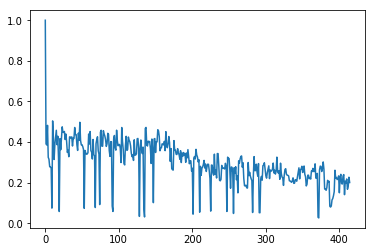

In [79]:
sns.lineplot(data=res[0])

In [3]:
num_of_samples = np.shape(img_arr)[2]

res_diff = np.zeros((num_of_samples, num_of_samples))
for i in tqdm_notebook(range(num_of_samples)):
    for j in range(num_of_samples):
        res_diff[i,j] = np.abs(np.sum(img_arr[:,:,i] - img_arr[:,:,j]))

In [4]:
res_diff[0].max()

17710.0

In [9]:
mins = np.argsort(res_diff[1])
mins

array([  1,  23, 228, 203, 202, 209,  39,  38,   0,  37,  40, 208, 220,
       285, 335, 252, 101,  30, 300, 246,  57, 187, 204, 100,  49, 290,
       212, 337,  95, 232,  79, 404, 403, 339, 375, 341, 183,  56, 236,
       185, 384, 145,  32, 163, 245, 296, 340, 299,  55, 175, 305,  35,
       414, 279, 338, 334,  31, 144,  26,  58, 314, 359, 277, 261, 160,
        85, 117, 294, 180,  86, 149, 140,  27, 281, 309,  93, 161, 233,
       304, 182, 280, 331, 336, 346, 330, 289, 329, 381,  94, 370, 328,
       374, 412, 368, 360, 189, 332, 168, 358, 348, 178, 342, 179, 171,
       112, 357, 199, 313, 264, 223, 157, 385, 347, 181, 206, 293, 253,
       192, 361, 106, 152, 401, 345, 190, 254, 167, 118, 366, 126, 402,
       411, 333,  72, 102, 257, 130, 218, 344, 234, 311, 200, 399, 386,
       364,  74,   2,  53, 397, 373, 398, 177, 164,  71,  15, 297, 301,
       266, 372, 394,  20, 287, 240, 325, 367, 405, 249, 267, 409, 239,
       250, 166, 129, 224, 104, 132, 248, 371, 343, 406, 291, 14

In [7]:
res_diff_pd = pd.DataFrame(res_diff)
res_diff_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,405,406,407,408,409,410,411,412,413,414
0,0.0,15257.0,14500.0,16179.0,15040.0,14555.0,15254.0,15496.0,14910.0,10892.0,...,9473.0,9891.0,10665.0,10462.0,9239.0,11560.0,9233.0,9154.0,10680.0,9397.0
1,7271.0,0.0,9739.0,15002.0,12839.0,15426.0,14077.0,14063.0,15013.0,10227.0,...,9832.0,9994.0,10768.0,10565.0,9854.0,11663.0,9592.0,9257.0,10015.0,8732.0
2,8540.0,12789.0,0.0,15503.0,13084.0,14647.0,14322.0,14308.0,15514.0,9960.0,...,9821.0,9471.0,10501.0,9530.0,9843.0,11652.0,9325.0,8990.0,10516.0,8465.0
3,6605.0,7526.0,7025.0,0.0,8845.0,13992.0,13411.0,13397.0,14091.0,11353.0,...,9678.0,10096.0,11638.0,9131.0,9700.0,11253.0,8926.0,9103.0,10373.0,9858.0
4,8000.0,9945.0,10212.0,14195.0,0.0,14363.0,13782.0,13768.0,14206.0,10444.0,...,10049.0,9443.0,10729.0,9502.0,9815.0,12136.0,9809.0,8706.0,10488.0,8949.0


In [8]:
res_diff_pd.loc[0, :]

0          0.0
1      15257.0
2      14500.0
3      16179.0
4      15040.0
5      14555.0
6      15254.0
7      15496.0
8      14910.0
9      10892.0
10     17631.0
11     16418.0
12     15417.0
13     15113.0
14     14746.0
15     14035.0
16     15368.0
17     15714.0
18     14642.0
19     10553.0
20     14062.0
21     13936.0
22     13536.0
23      7768.0
24     15543.0
25     15807.0
26     13346.0
27     10975.0
28     14786.0
29     14517.0
        ...   
385    10105.0
386    10122.0
387    12030.0
388    11991.0
389    11724.0
390    11043.0
391    11864.0
392    11446.0
393    11881.0
394     9709.0
395    10174.0
396     9618.0
397     9654.0
398     9659.0
399     9603.0
400    10217.0
401     8903.0
402     9741.0
403     8091.0
404     8066.0
405     9473.0
406     9891.0
407    10665.0
408    10462.0
409     9239.0
410    11560.0
411     9233.0
412     9154.0
413    10680.0
414     9397.0
Name: 0, Length: 415, dtype: float64

In [26]:
# Feature request found here: https://github.com/scikit-image/scikit-image/issues/3012
# Found here: https://stackoverflow.com/questions/32655686/histogram-matching-of-two-images-in-python-2-x/33047048#33047048
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [27]:
num_of_samples = np.shape(img_arr)[2]

res_hist = np.zeros((num_of_samples, num_of_samples))
for i in tqdm_notebook(range(num_of_samples)):
    img_ref = img_arr[:,:,i]
    img_ref_total = np.sum(img_ref)
    for j in range(num_of_samples):
        img_src = img_arr[:,:,j]
        matched = hist_match(img_src, img_ref)
        res_hist[i,j] = (np.abs(np.sum(img_ref - matched)))
        

In [28]:
pd.DataFrame(res_hist)

,0,1,2,3,4,5,6,7,8,9,...,405,406,407,408,409,410,411,412,413,414
0,0.000000,102.983333,79.233333,41.983333,96.966667,170.433333,127.666667,117.300000,100.033333,254.266667,...,96.533333,155.783333,281.366667,131.900000,108.116667,81.700000,106.900000,99.483333,74.350000,86.283333
1,77.500000,0.000000,25.166667,31.500000,51.250000,138.500000,101.583333,107.333333,96.666667,199.333333,...,75.833333,117.333333,175.166667,141.250000,113.250000,71.166667,136.333333,105.000000,55.416667,54.333333
2,18.083333,43.166667,0.000000,13.416667,18.583333,166.916667,103.000000,92.333333,118.666667,202.333333,...,63.500000,122.166667,213.416667,77.916667,105.500000,44.750000,89.000000,68.500000,37.250000,76.916667
3,37.333333,62.833333,49.500000,0.000000,28.833333,161.166667,137.000000,124.000000,102.166667,272.166667,...,52.500000,137.000000,256.000000,100.000000,105.333333,82.000000,145.000000,99.500000,96.333333,92.833333
4,32.500000,48.166667,57.500000,19.333333,0.000000,153.500000,185.833333,173.666667,126.833333,268.000000,...,67.833333,155.000000,216.000000,106.833333,102.666667,101.500000,144.333333,135.666667,82.666667,83.833333
5,2.316667,43.383333,72.788889,8.377778,28.988889,0.000000,87.372222,71.372222,32.588889,373.955556,...,26.288889,121.894444,190.238889,111.111111,77.444444,62.427778,146.877778,180.650000,99.544444,122.133333
6,11.333333,68.316667,50.700000,13.033333,21.950000,56.966667,0.000000,5.133333,36.600000,270.266667,...,6.200000,56.083333,200.750000,59.066667,66.000000,69.000000,108.533333,129.233333,21.400000,63.233333
7,11.800000,80.766667,59.400000,2.716667,34.966667,74.700000,24.500000,0.000000,53.666667,288.600000,...,8.500000,86.633333,219.550000,71.666667,86.016667,78.116667,130.116667,143.683333,25.083333,78.450000
8,50.933333,24.100000,75.050000,51.683333,38.150000,77.000000,130.433333,135.333333,0.000000,440.850000,...,86.483333,132.433333,228.600000,141.983333,148.800000,109.333333,134.700000,165.600000,135.033333,156.783333
9,28.685714,57.800000,38.792857,60.790476,55.297619,144.514286,107.221429,106.971429,156.971429,0.000000,...,60.838095,137.995238,189.226190,75.204762,26.254762,24.523810,41.928571,3.340476,28.650000,11.890476
